In [1]:
from tqdm import tqdm

import torch
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import euclidean_distances

C:\Users\jsfz\anaconda3\envs\pytorch17\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def l2_normailzation(data):
    norms = np.linalg.norm(data, axis=1, keepdims=True)
    return data / norms

In [10]:
path_template_former = "draw_wos_data/deberta_su_test_label"
path_template_hinder = "_lastmean.npy"

In [11]:
dist_list = []
for i in range(7):
    repr_path = path_template_former + str(i) + path_template_hinder
    feas = np.load(repr_path)
    feas = l2_normailzation(feas)
    distances = euclidean_distances(feas, feas)
    upper_dist = np.triu(distances, 1)
    for i in range(upper_dist.shape[0]):
        for j in range(i+1, upper_dist.shape[0]):
            dist_list.append(upper_dist[i][j])

In [12]:
len(dist_list)

1755174

In [13]:
sbin = np.histogram_bin_edges(a=dist_list, bins=10, range=(0,2))

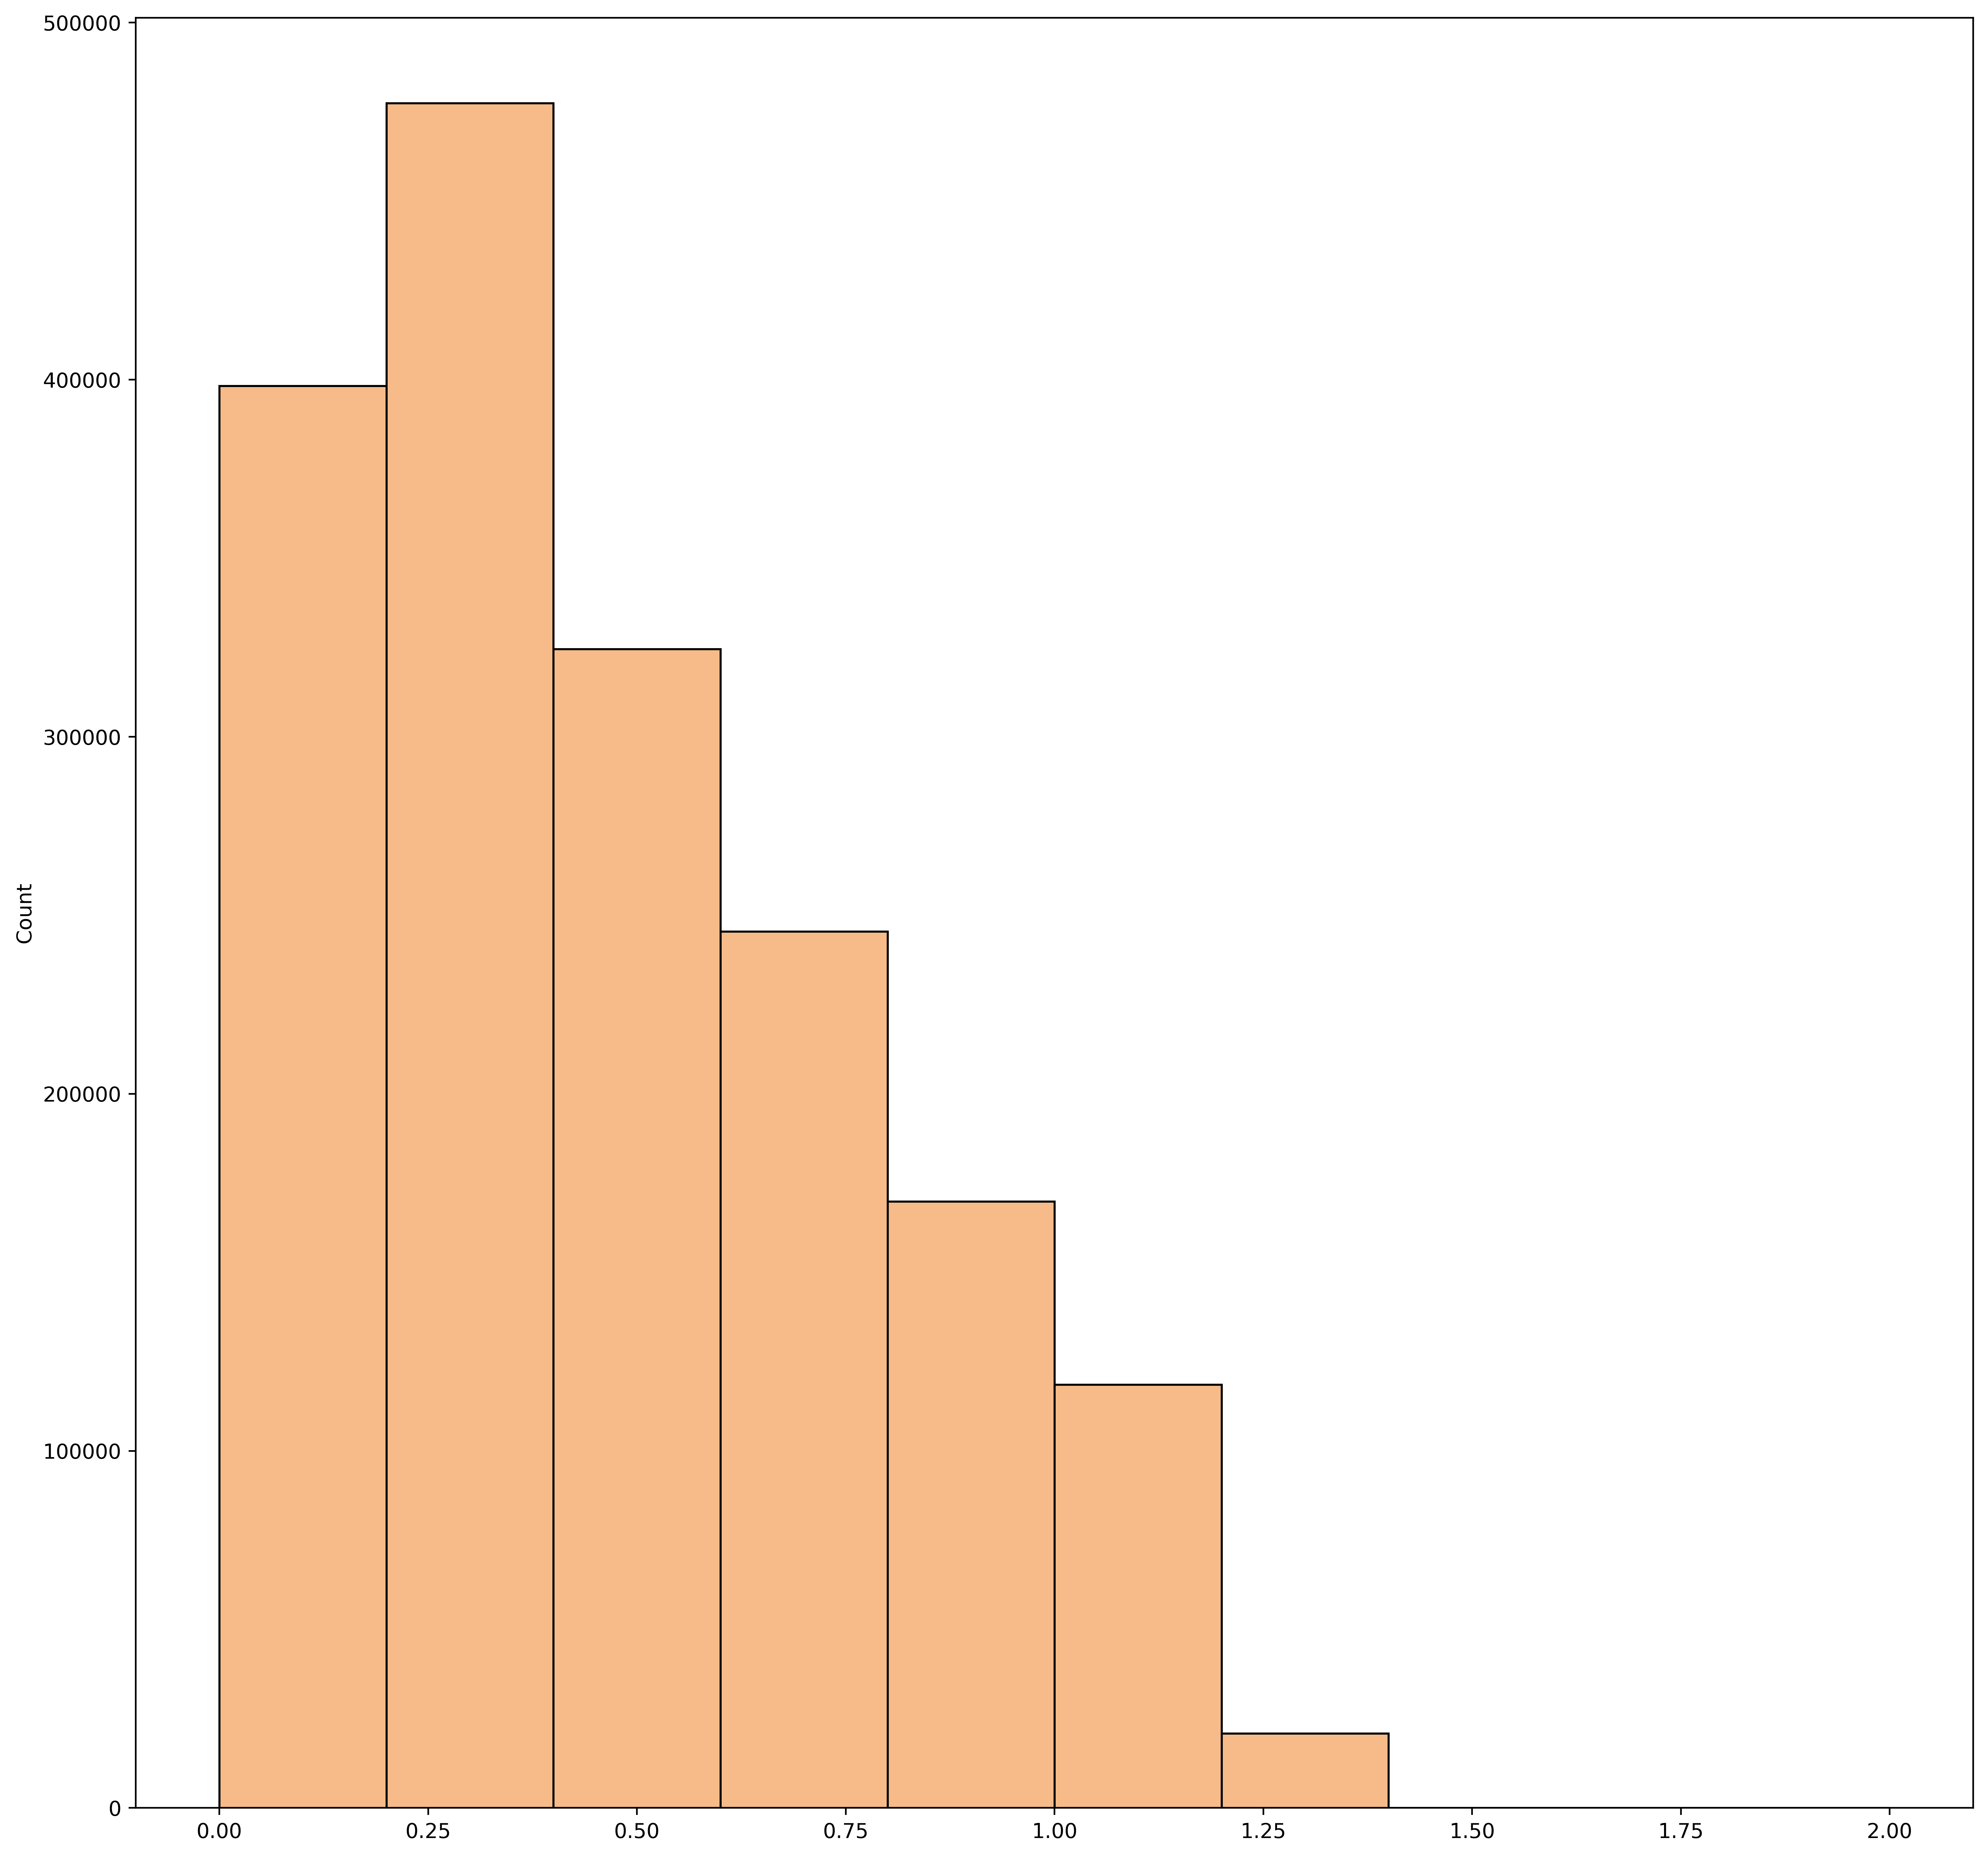

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(16,16), dpi=500)
ax1 = sns.histplot(data=dist_list, bins=sbin, color="sandybrown")

In [15]:
fig1.savefig("draw_wos_data/deberta_su_test_alllabel_l2distance.jpg", bbox_inches="tight")